In [1]:
import numpy as np
from scipy.special import sph_harm

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

%matplotlib nbagg

Define Spherical Harmoics Y using familiar compact notations 

In [2]:
def Ylm(l, m, T, P):
    return sph_harm(m, l, T, P)

def spherical_to_cart(R, T, P):
    X = R*np.sin(P)*np.cos(T)
    Y = R*np.sin(P)*np.sin(T)
    Z = R*np.cos(P)
    return X, Y, Z

def plot(ax, R, T, P, **kwargs):
    X, Y, Z = spherical_to_cart(R, T, P)
    # remove last two arguments for faster execution
    surface = ax.plot_surface(X, Y, Z, **kwargs, antialiased=True, rcount=200, ccount=200)
    return surface

/Users/markdean/anaconda/envs/main/lib/python3.6/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide
/Users/markdean/anaconda/envs/main/lib/python3.6/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)
/Users/markdean/anaconda/envs/main/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


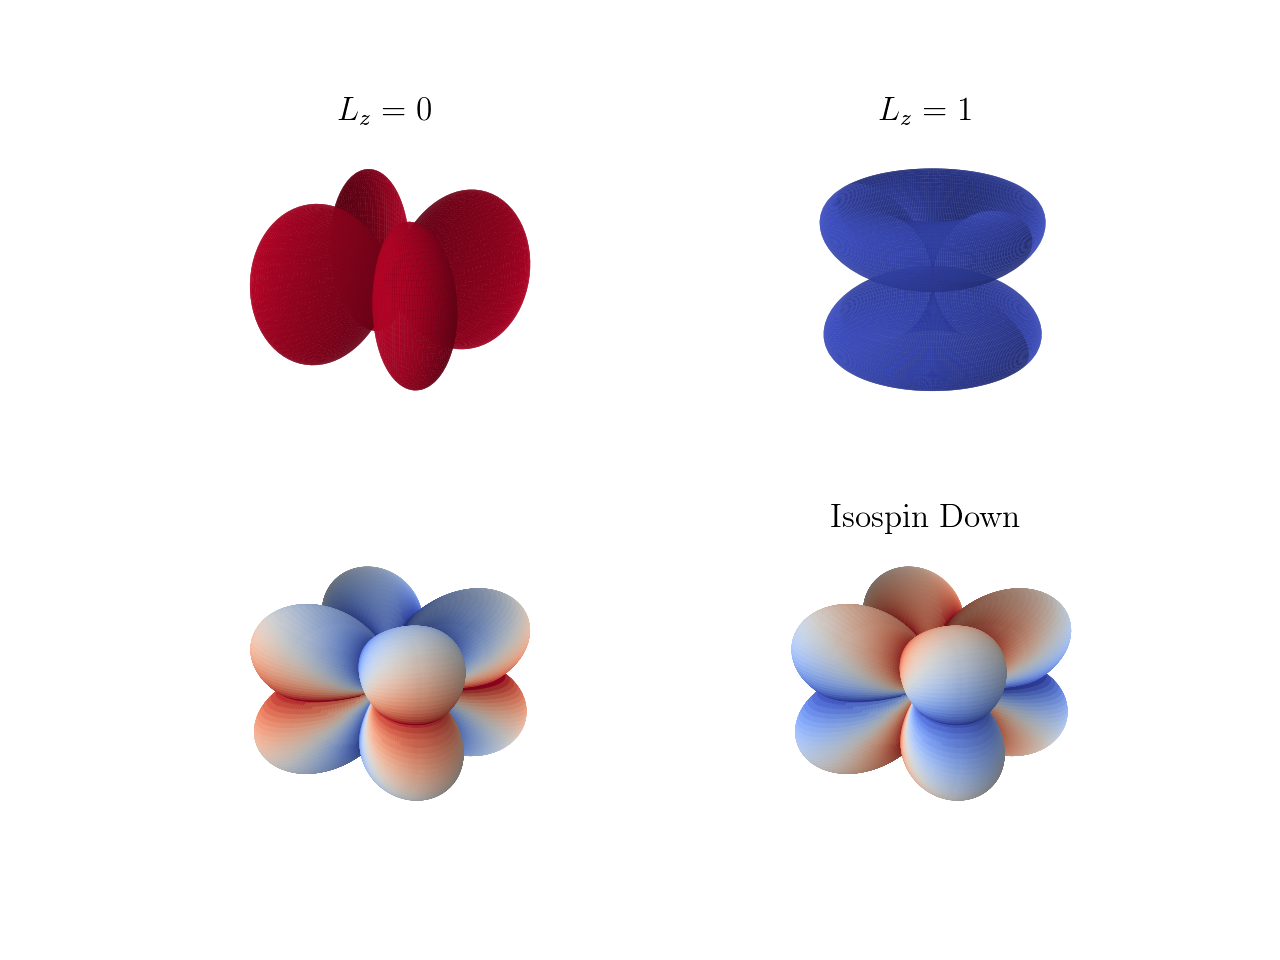

In [3]:
theta = np.linspace(0,   np.pi,  91*2)
phi   = np.linspace(-np.pi, np.pi, 181)
T, P = np.meshgrid(theta, phi)

l = 2
lz0 = -1j / np.sqrt(2) * ( Ylm(l,2,T,P) - Ylm(l,-2,T,P))
lz1 = -1j * Ylm(2,1, T, P)

C = np.abs(lz0) / (np.abs(lz1) + np.abs(lz0))
isoupfacecolors=plt.cm.get_cmap("coolwarm")(C)

C = np.abs(lz1) / (np.abs(lz1) + np.abs(lz0))
isodownfacecolors=plt.cm.get_cmap("coolwarm")(C)

redblue = plt.cm.get_cmap("coolwarm")(np.linspace(0,1,2))
red = redblue[0]
blue = redblue[1]

fig = plt.figure()
axs = [fig.add_subplot(2,2,n, projection='3d') for n in range(1,4+1)]

# lz0
R = np.abs(lz0)
plot(axs[0], R, T, P, color=blue)
axs[0].set_title('$L_z=0$')

# lz1
R = np.abs(lz1)
plot(axs[1], R, T, P, color=red)
axs[1].set_title('$L_z=1$')

# iso up
R = np.abs(lz0) + np.abs(lz1)
plot(axs[2], R, T, P, facecolors=isoupfacecolors)

# iso down
R = np.abs(lz0) + np.abs(lz1)
plot(axs[3], R, T, P, facecolors=isodownfacecolors)
axs[3].set_title('Isospin Down')

for ax in axs:
    ax.axis('off')


fig.savefig('ex_4_orbitals.pdf')